In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

2025-11-12 00:43:23.763810: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-12 00:43:23.819217: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-12 00:43:25.719854: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
# Charger le modèle
model = load_model('../notebooks/facial_detection_model.keras')


# Les classes que ton modèle peut prédire
class_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

2025-11-12 00:43:26.781889: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:

image = cv2.imread("../data/img_perso/img1.jpeg")
# print("Dimensions de l'image: ",image.shape)


In [4]:
# on convertit l'image en noir et blanc
# l'algorithme que nous allons utilisé a besoin de ce pretraitement
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [5]:
# on charge notre modèle
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [6]:
# on verifie que le modèle a bien été chargée
if face_cascade.empty()==True:
	print("Le fichier n'est pas chargé: ", face_cascade.empty())
else:
	print("Le fichier est chargé.")

Le fichier est chargé.


In [7]:
# On cherche tous les visages disponibles dans l'image
faces = face_cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=10)
# on écrit dans la console le nombre de visages que  l'algorithme a détecté
print(f"{len(faces)} visages detectés dans l'image.")

1 visages detectés dans l'image.


In [8]:
for (x, y, w, h) in faces:
    # Extraire le visage en gris
    roi_gray = image_gray[y:y+h, x:x+w]
    
    # Redimensionner à la taille attendue par ton modèle (ex: 48x48)
    roi_gray = cv2.resize(roi_gray, (48, 48))
    
    # Normaliser et convertir en tableau
    roi = roi_gray.astype('float') / 255.0
    roi = img_to_array(roi)
    roi = np.expand_dims(roi, axis=0)  

    # Prédiction
    preds = model.predict(roi)[0]
    label = class_labels[np.argmax(preds)]
    predicted_index = np.argmax(preds)
    label = class_labels[predicted_index]
    confidence = preds[predicted_index] * 100 
    
    # Afficher la prédiction et la probabilité sur l'image
    text = f"{label} ({confidence:.2f}%)"
    cv2.putText(image, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), 2)
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    # Afficher la prédiction sur l'image
    cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), 2)
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


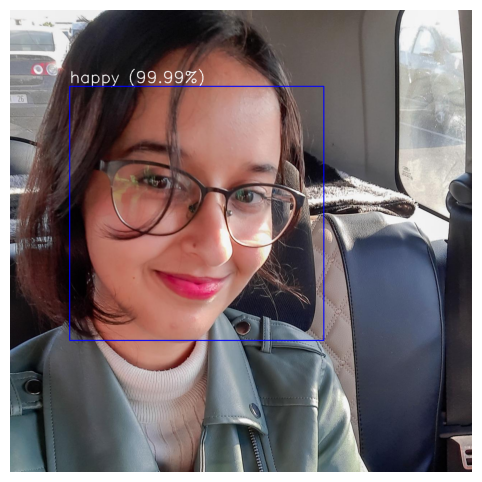

In [9]:
import matplotlib.pyplot as plt
# Afficher le résultat avec matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [10]:
# cv2.imwrite("new.jpg", image)